## Гипотезы

Используем уровезь значимости 5%

In [151]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

df = pd.read_csv('movies_data_2.0.csv')

### Гипотеза 1

**Фильмы с более высоким бюджетом получают более высокие рейтинги на КиноПоиск.**

$$
\begin{aligned}
& H_0: \mu_{бюджет} = \mu_{рейтинг} \\
& H_1: \mu_{бюджет} \neq \mu_{рейтинг}
\end{aligned}
$$

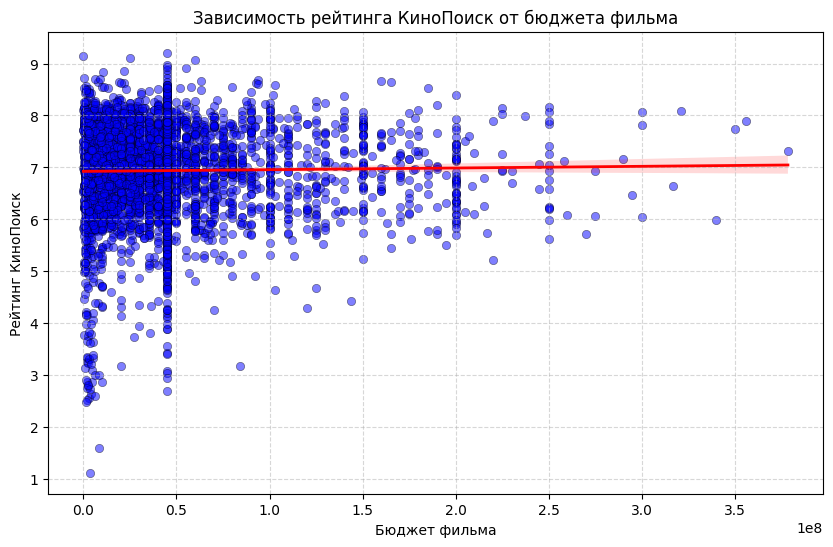

In [152]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Бюджет'], y=df['Рейтинг КиноПоиск'], alpha=0.5, color='blue', edgecolor='black')
sns.regplot(x=df['Бюджет'], y=df['Рейтинг КиноПоиск'], scatter=False, color='red', line_kws={'linewidth':2})


plt.xlabel('Бюджет фильма')
plt.ylabel('Рейтинг КиноПоиск')
plt.title('Зависимость рейтинга КиноПоиск от бюджета фильма')
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()


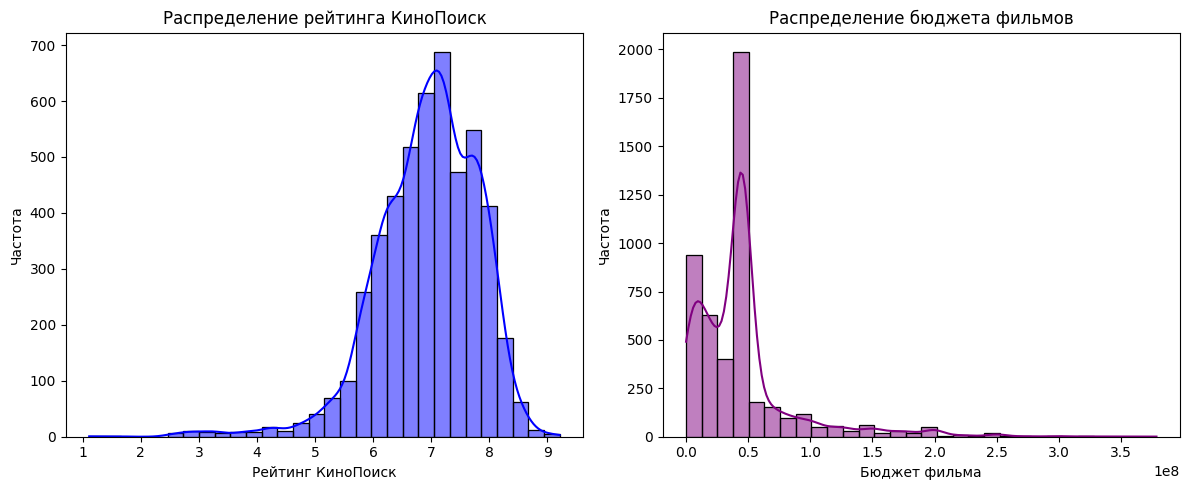

In [153]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Рейтинг КиноПоиск'], bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel('Рейтинг КиноПоиск')
plt.ylabel('Частота')
plt.title('Распределение рейтинга КиноПоиск')

plt.subplot(1, 2, 2)
sns.histplot(df['Бюджет'], bins=30, kde=True, color='purple', edgecolor='black')
plt.xlabel('Бюджет фильма')
plt.ylabel('Частота')
plt.title('Распределение бюджета фильмов')

plt.tight_layout()
plt.show()

Распределение переменных не похоже на нормальное. Будем использовать непараметрический тест Манна-Уитни.

In [154]:
# Применение теста Манна-Уитни
statistic, p_value = mannwhitneyu(рейтинг, бюджет, alternative='less')

# Вывод результатов
print('Mann-Whitney U statistic:', statistic)
print('P-value:', p_value)

# Проверка статистической значимости
alpha = 0.05  # Уровень значимости

if p_value < 0.05:
    print("Вывод: Гипотеза о том, что в среднем фильмы с более высоким бюджетом получают более высокие рейтинги на КиноПоиск отвергается")
else:
    print("Вывод: Гипотеза о том, что в среднем фильмы с более высоким бюджетом получают более высокие рейтинги на КиноПоиск не отвергается")

Mann-Whitney U statistic: 23755876.0
P-value: 1.0
Вывод: Гипотеза о том, что в среднем фильмы с более высоким бюджетом получают более высокие рейтинги на КиноПоиск не отвергается


### Гипотеза 2
**Правда ли, что в среднем кассовые сборы фильмов, вышедших после 2000 года больше, чем до 2000 года**

$$
\begin{aligned}
& H_0: p_{new} = p_{old} \\
& H_1: p_{new} > p_{old}
\end{aligned}
$$

In [155]:
df_a = df[df['Год выпуска'] <= 2000]
df_b = df[df['Год выпуска'] > 2000]

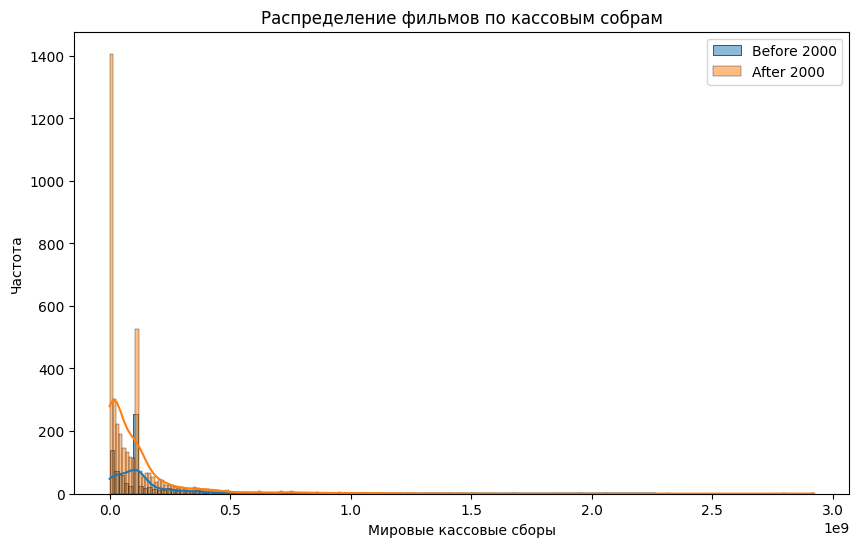

In [156]:
# Создание двух выборок: фильмы до 2000 года и фильмы после 2000 года
fees_before_2000 = df[df['Год выпуска'] < 2000]['Мировые кассовые сборы']
fees_after_2000 = df[df['Год выпуска'] >= 2000]['Мировые кассовые сборы']

# График распределения
plt.figure(figsize=(10, 6))
sns.histplot(fees_before_2000, label='Before 2000', kde=True)
sns.histplot(fees_after_2000, label='After 2000', kde=True)
plt.xlabel('Мировые кассовые сборы')
plt.ylabel('Частота')
plt.title('Распределение фильмов по кассовым собрам')
plt.legend()
plt.show()

Опять же для проверки используем U-критерий Манна-Уитни

In [157]:
# Применение теста Манна-Уитни
statistic, p_value = mannwhitneyu(fees_before_2000, fees_after_2000, alternative='less')

# Вывод результатов
print('Mann-Whitney U statistic:', statistic)
print('P-value:', p_value)

# Проверка статистической значимости
alpha = 0.05  # Уровень значимости

if p_value < 0.05:
    print("Вывод: Гипотеза о том, что в среднем кассовые сборы фильмов, вышедших после 2000 года больше, чем до 2000 года отвергается")
else:
    print("Вывод: Гипотеза о том, что в среднем кассовые сборы фильмов, вышедших после 2000 года больше, чем до 2000 года не отвергается")


Mann-Whitney U statistic: 1981550.5
P-value: 1.0
Вывод: Гипотеза о том, что в среднем кассовые сборы фильмов, вышедших после 2000 года больше, чем до 2000 года не отвергается


### Гипотеза 3

**Средняя длительность фильмов в 20 веке меньше длительности фильмов в 21 веке**

$$
\begin{aligned}
& H_0: \mu_{XX} = \mu_{XXI} \\
& H_1: \mu_{XX} \neq \mu_{XXI}
\end{aligned}
$$

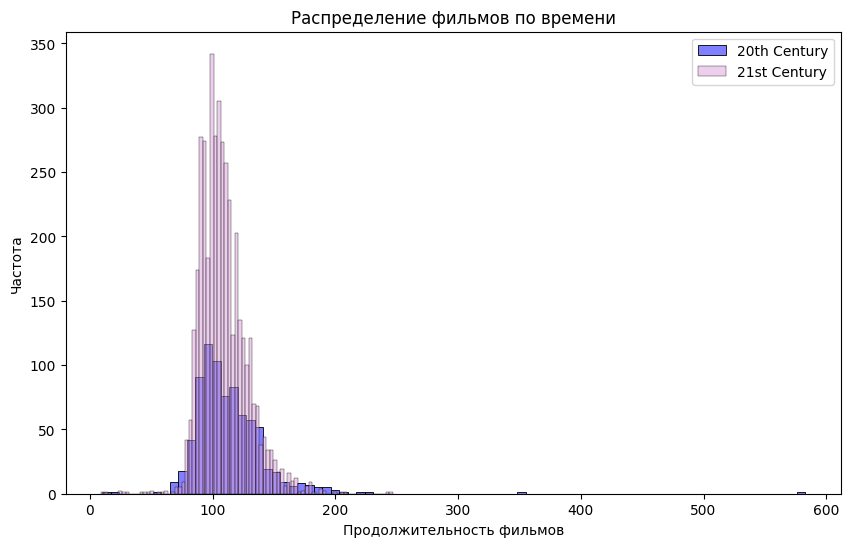

In [158]:
# Фильтрация данных для 20-го века
films_20th = df[df['Год выпуска'].between(1900, 1999)]

# Фильтрация данных для 21-го века
films_21st = df[df['Год выпуска'].between(2000, 2100)]

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.histplot(films_20th['Длительность'], label='20th Century', color='blue', alpha=0.5)
sns.histplot(films_21st['Длительность'], label='21st Century', color='plum', alpha=0.5)
plt.xlabel('Продолжительность фильмов')
plt.ylabel('Частота')
plt.title('Распределение фильмов по времени')
plt.legend()
plt.show()

Распределение выглядит нормальным если исключить 2-3 выброса. Поэтому исключим аномальные значения с помощью межквартильного размаха и для анализа воспользуемся t-критерием Стьюдента


In [159]:
Q1 = df_filtered["Длительность"].quantile(0.25)
Q3 = df_filtered["Длительность"].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df_filtered[(df_filtered["Длительность"] >= Q1 - 1.5 * IQR) & (df_filtered["Длительность"] <= Q3 + 1.5 * IQR)]

# Фильтрация данных для 20-го века
films_20th = df_filtered[df_filtered['Год выпуска'].between(1900, 1999)]
# Фильтрация данных для 21-го века
films_21st = df_filtered[df_filtered['Год выпуска'].between(2000, 2100)]

t_statistic, p_value = stats.ttest_ind(films_20th['Длительность'], films_21st['Длительность'], equal_var=False)

# Вывод результата t-теста
print('t-Statistic:', t_statistic)
print('p-Value:', p_value)
if p_value < 0.05:
    print("Вывод: Гипотеза о том, что средняя длительность фильмов в 20 веке меньше длительности фильмов в 21 веке отвергается")
else:
    print("Вывод: Гипотеза о том, что средняя длительность фильмов в 20 веке меньше длительности фильмов в 21 веке не отвергается") 


t-Statistic: 1.1307613637907508
p-Value: 0.25844200981133314
Вывод: Гипотеза о том, что средняя длительность фильмов в 20 веке меньше длительности фильмов в 21 веке не отвергается
